## Single Task plots

In [9]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [10]:
def load_model_data(json_file_paths):

    model_data = []

    for json_path_str in json_file_paths:
        json_path = Path(json_path_str)

        if json_path.is_file():
            try:
                with json_path.open("r", encoding="utf-8") as file:
                    data = json.load(file)
                    model_data.append(data)
            except (json.JSONDecodeError, UnicodeDecodeError):
                # Skip files with invalid JSON or encoding issues
                continue
            except Exception:
                # Skip any other exceptions
                continue

    return model_data


def plot_metric(metric, title, ylabel, model_data, linestyle="-", custom_ylim=None):

    if not model_data:
        print("No data to plot. Ensure JSON files are correctly loaded.")
        return

    epochs = range(1, model_data[0]["epochs"] + 1)
    colors = plt.cm.tab10.colors

    plt.figure(figsize=(15, 10))
    for i, data in enumerate(model_data):
        plt.plot(
            epochs,
            data[metric],
            label=f'{data["Model"]}',
            linestyle=linestyle,
            color=colors[i % len(colors)],
        )
    plt.title(title, fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    if custom_ylim:
        plt.ylim(custom_ylim)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


def plot_test_metrics(model_data):

    if not model_data:
        print("No data to plot. Ensure JSON files are correctly loaded.")
        return

    test_metrics = [(data["Model"], data["test_accuracy"], data["test_loss"]) for data in model_data]
    models, test_accuracies, test_losses = zip(*test_metrics)
    colors = plt.cm.tab10.colors

    # Test Accuracy
    plt.figure(figsize=(15, 5))
    plt.bar(models, test_accuracies, color=colors[: len(models)])
    plt.title("Test Accuracy Comparison", fontsize=16)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Test Loss
    plt.figure(figsize=(15, 5))
    plt.bar(models, test_losses, color=colors[: len(models)])
    plt.title("Test Loss Comparison", fontsize=16)
    plt.ylabel("Loss", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


def analyze_models(parent_folder):

    model_data = load_model_data(parent_folder)
    if not model_data:
        print("No models found. Please check the directory structure and JSON file names.")
        return

    # Training metrics
    plot_metric("train_accuracy", "Training Accuracy", "Accuracy", model_data, custom_ylim=(0.95, 1.0))
    plot_metric("train_loss", "Training Loss", "Loss", model_data)

    # Validation metrics
    plot_metric("val_accuracy", "Validation Accuracy", "Accuracy", model_data, linestyle="--", custom_ylim=(0.975, 1.0))
    plot_metric("val_loss", "Validation Loss", "Loss", model_data, linestyle="--")

    # Test performance
    plot_test_metrics(model_data)


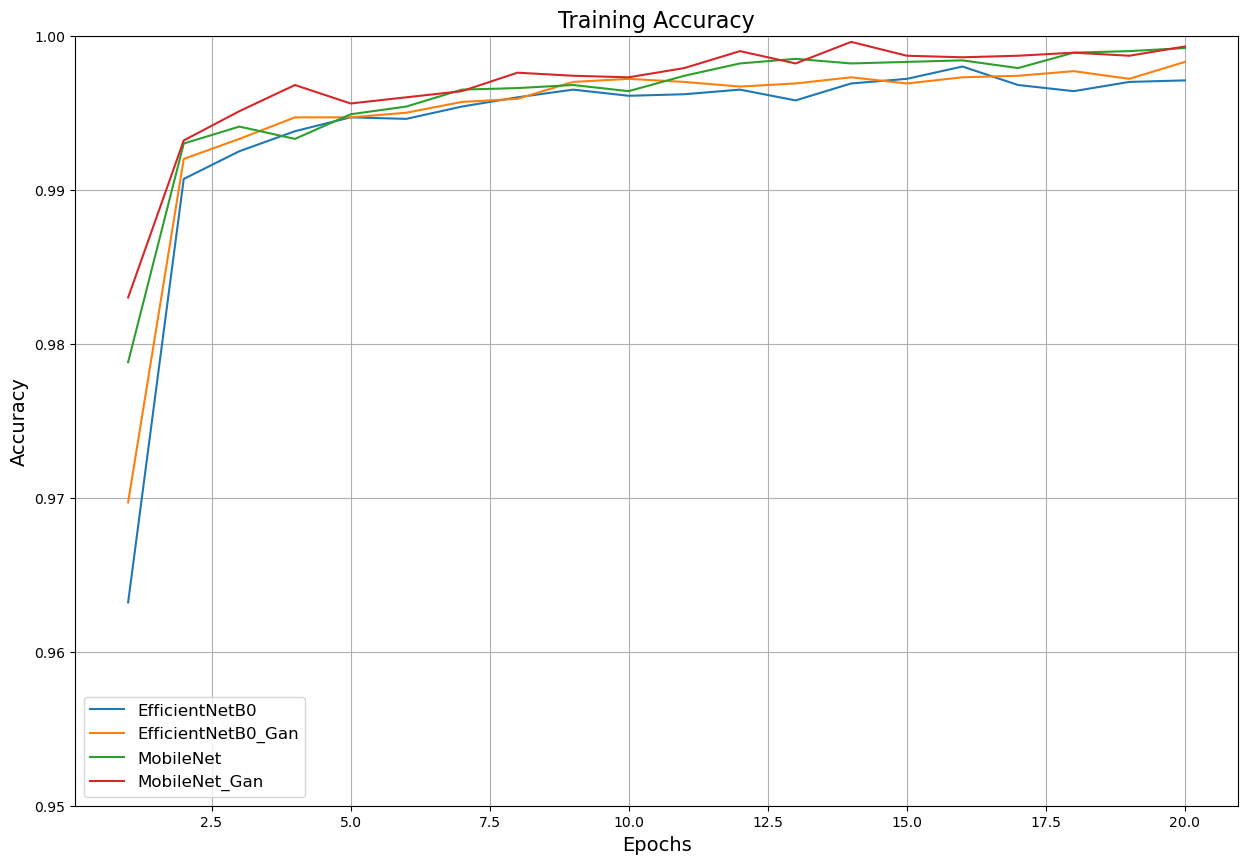

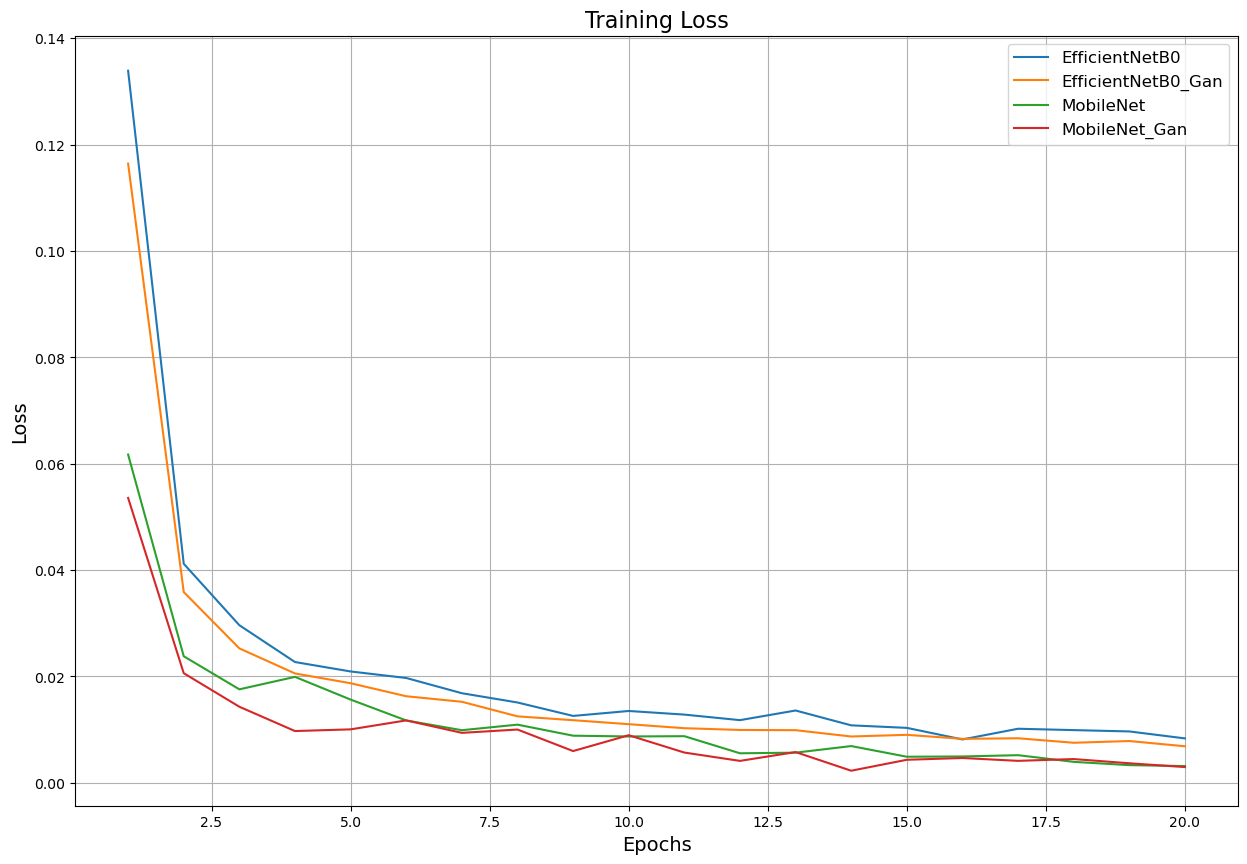

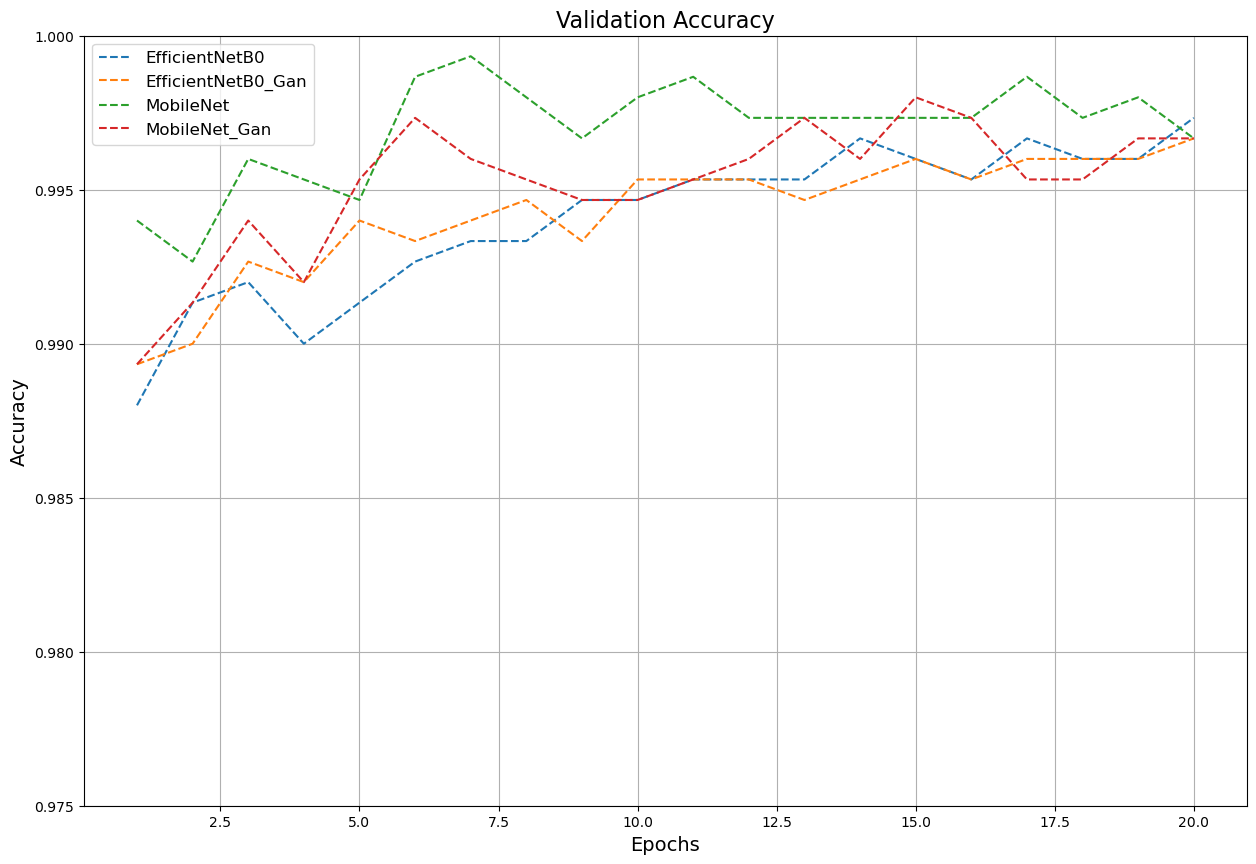

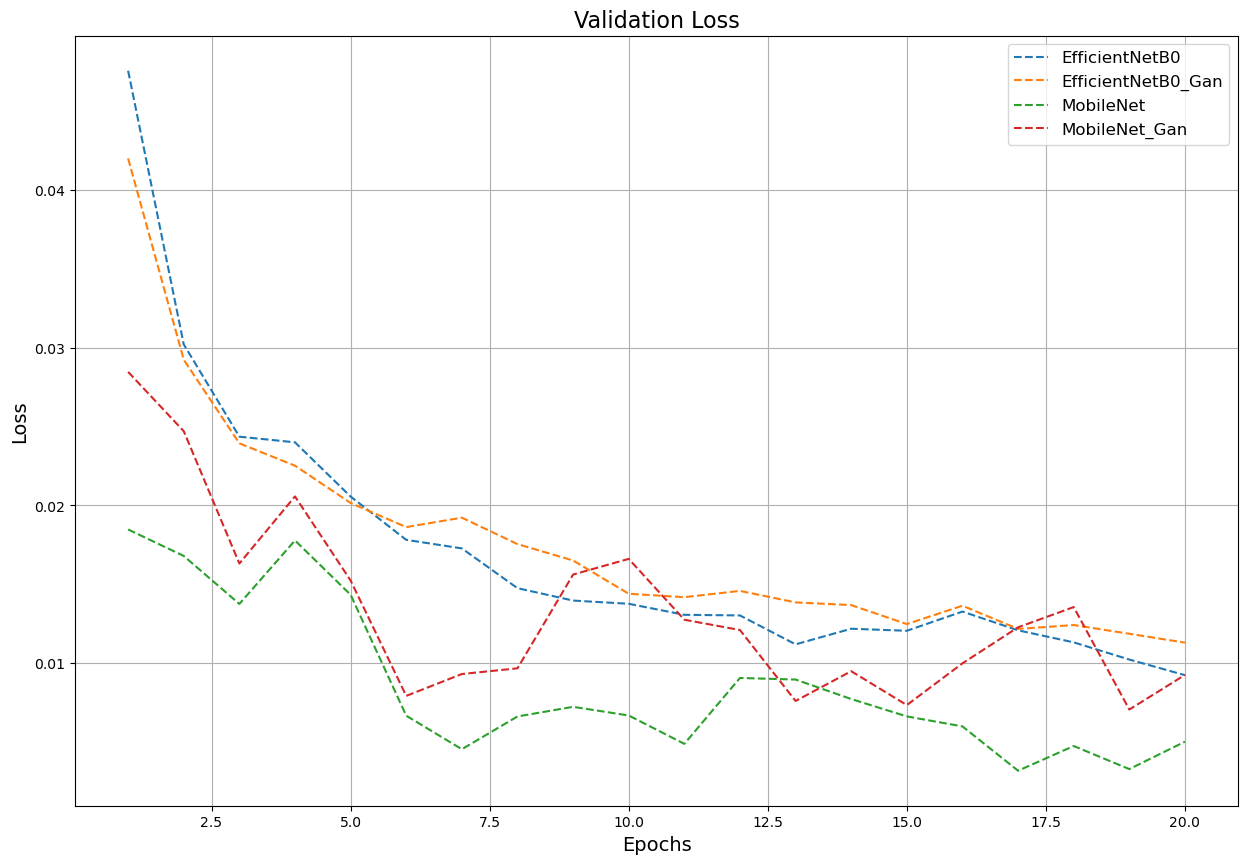

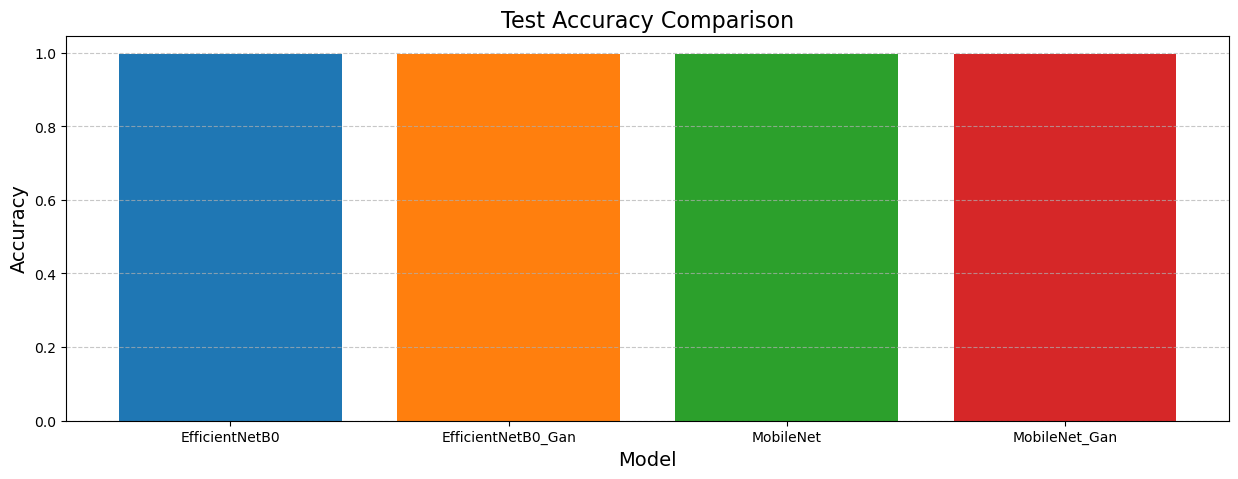

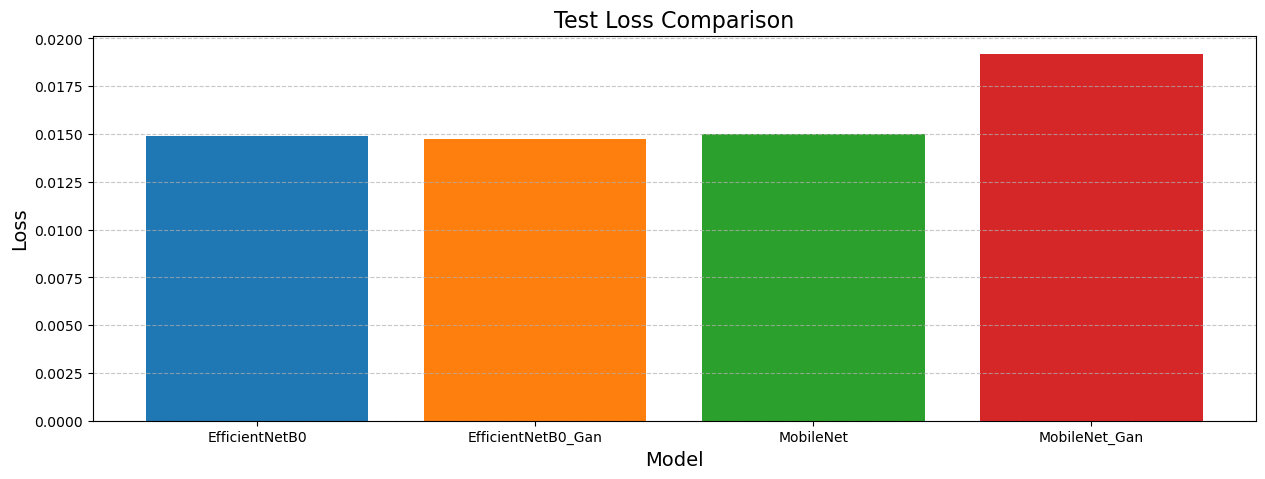

In [12]:
analyze_models(["../results/Single Task/EfficientNetB0/EfficientNetB0_training_info.json",'../results/Single Task/EfficientNetB0_Gan/EfficientNetB0_Gan_training_info.json','../results/Single Task/MobileNet/MobileNet_training_info.json','../results/Single Task/MobileNet_Gan/MobileNet_Gan_training_info.json'])

In [2]:
def plot_combined_losses(directories):
    if len(directories) != 2:
        print("This function requires exactly two directories for comparison (GAN 1 and GAN 2).")
        return

    gan_labels = ["GAN 1", "GAN 2"]
    colors = ["blue", "orange"]

    # Collect losses for both GANs
    all_d_losses = []
    all_g_losses = []
    all_epochs = []

    for idx, directory in enumerate(directories):
        json_files = [f for f in os.listdir(directory) if f.endswith('.json')]
        if not json_files:
            print(f"No JSON file found in directory: {directory}")
            continue

        json_file = json_files[0] 
        file_path = os.path.join(directory, json_file)

        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON in file {file_path}: {e}")
            continue

        epochs = [epoch['epoch_number'] for epoch in data['epochs']]
        mean_d_losses = [epoch['mean_d_loss'] for epoch in data['epochs']]
        mean_g_losses = [epoch['mean_g_loss'] for epoch in data['epochs']]

        all_epochs.append(epochs)
        all_d_losses.append(mean_d_losses)
        all_g_losses.append(mean_g_losses)

    # Plot combined discriminator losses
    plt.figure(figsize=(10, 6))
    for idx in range(2):
        plt.plot(all_epochs[idx], all_d_losses[idx], label=f"{gan_labels[idx]} Discriminator Loss", color=colors[idx], marker='o')
    plt.title("Discriminator Loss Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot combined generator losses
    plt.figure(figsize=(10, 6))
    for idx in range(2):
        plt.plot(all_epochs[idx], all_g_losses[idx], label=f"{gan_labels[idx]} Generator Loss", color=colors[idx], marker='o')
    plt.title("Generator Loss Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

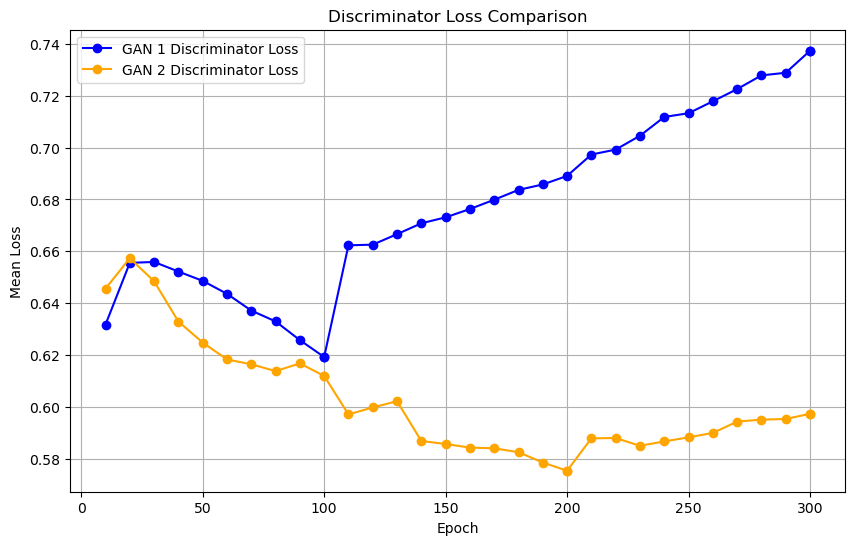

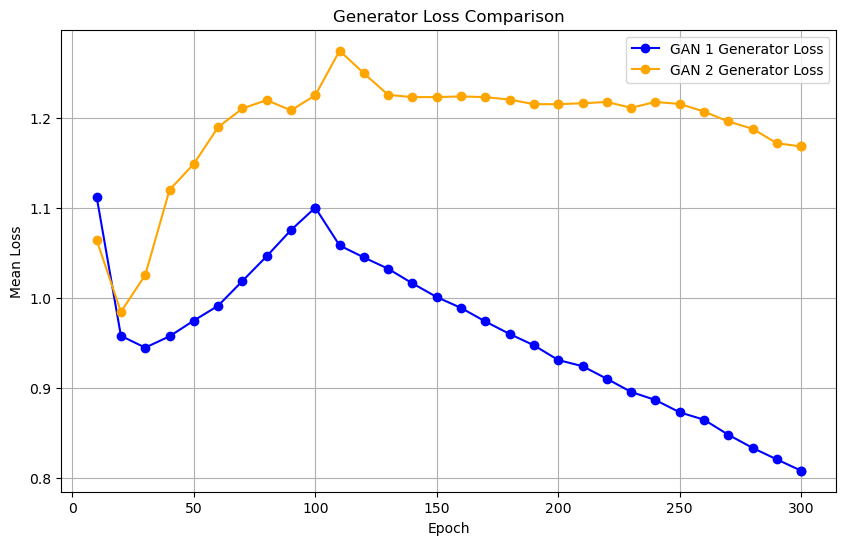

In [3]:
plot_combined_losses(['../results/cgan1/', '../results/cgan2/'])

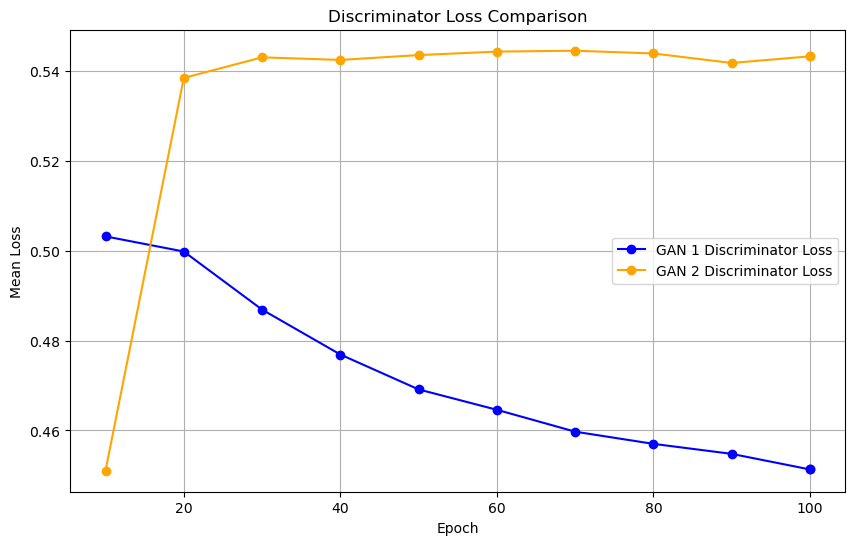

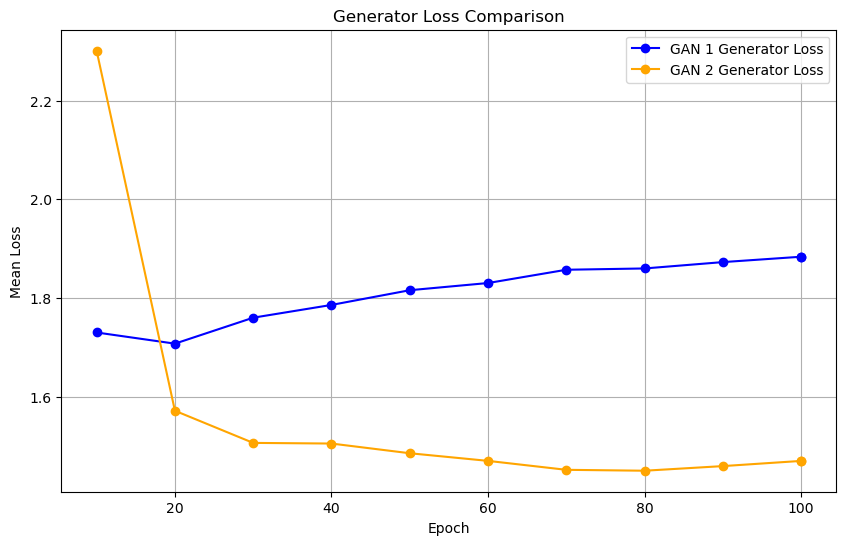

In [4]:
plot_combined_losses(['../results/cgan1/', '../results/cgan2/'])